<a href="https://colab.research.google.com/github/abel-salazar/CienciaDatosPython/blob/main/Proyecto_N%C2%B0_03_Ciencia_Datos_con_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

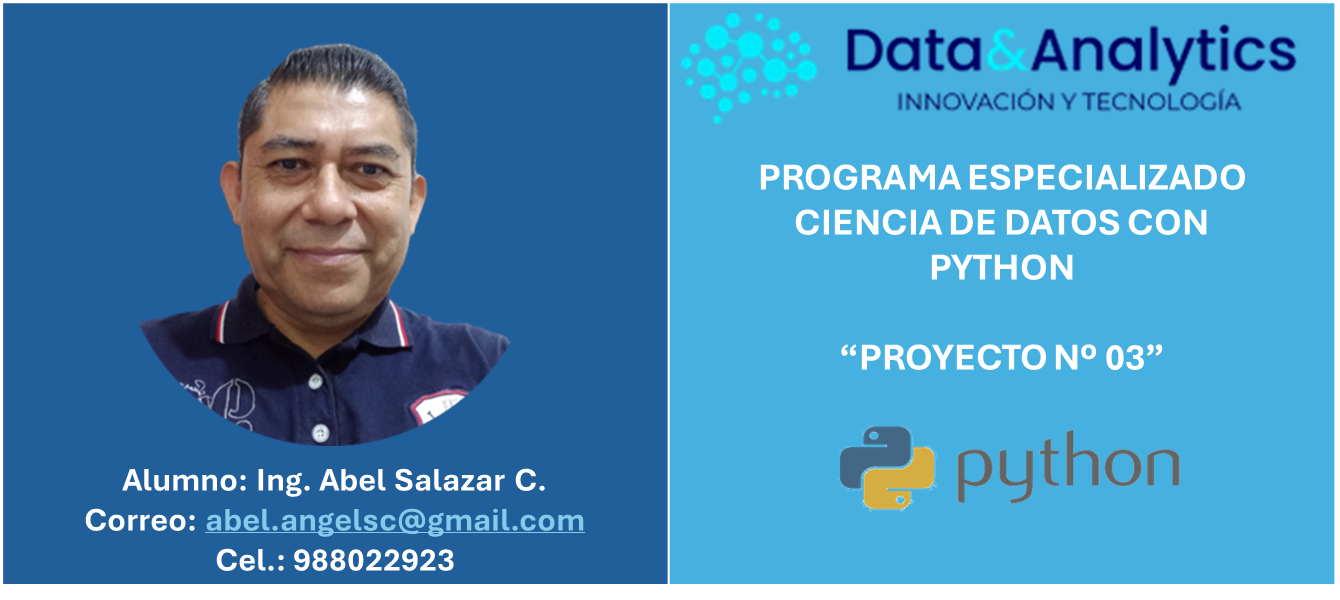

# **CASO: ESTADO NUTRICIONAL**

##**Ejercicio N°1:** Análisis Exploratorio de datos (EDA)
- Generar nuevas variables de valor (De ser necesario)

**- 1er notebook:** Análisis Exploratorio de datos (EDA) - Estadística Descriptiva; Incluir la generación de nuevas variables de valor.


**Paso 1: Carga y Exploración de Datos**

In [ ]:
#Importamos las librerias necesarias para el desarrollo de los ejercicios
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind
from google.colab import drive

**Explicación:**

***import pandas as pd:*** Importa la biblioteca pandas bajo el alias pd, que nos permite trabajar con estructuras de datos como DataFrames.

***import numpy as np:*** Importa la biblioteca numpy bajo el alias np, que nos proporciona funciones matemáticas eficientes para trabajar con arreglos numéricos.

***import matplotlib.pyplot as plt:*** Importa la sublibrería pyplot de matplotlib para realizar visualizaciones gráficas.

***import seaborn as sns:*** Importa la biblioteca seaborn bajo el alias sns, que proporciona estilos y funciones adicionales para visualizaciones.

***from scipy.stats import ttest_ind:*** Importa la función ttest_ind de la biblioteca scipy.stats para realizar pruebas t de dos muestras.

***from google.colab import drive: *** importa el módulo drive del paquete google.colab en Google Colab. Este módulo proporciona funcionalidades para montar y acceder a Google Drive desde un entorno de notebook en Colab.




In [13]:
# Paso 1: forma 1:  Cargar los datos al dataframe df, desde el archivo Data_Nutricion_grupos.xlsx, ubicado en la carpeta: Colab Notebooks/data.
# tener en cuenta que la ruta: /content/drive/My Drive, es la ruta base de tu google drive. Debe contar con permisos de cambio.
# drive.mount('/content/drive/'):** es una forma de montar tu Google Drive en el entorno de Colab.***'/content/drive/'***
# es la ruta en la que se montará Google Drive dentro del entorno de Colab. Esto significa que una vez que se ejecute esta función,
# podrás acceder a tu Google Drive desde la ubicación /content/drive/ en el entorno de Colab.
# Cuando ejecutas drive.mount('/content/drive/'), se generará un enlace para autorizar el acceso a tu Google Drive.
drive.mount('/content/drive/')
df = pd.read_excel("/content/drive/My Drive/Colab Notebooks/data/Data_Nutricion_grupos.xlsx")

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [14]:
# Paso 1: forma 2: Otra forma (no utliza drive.mount) para conectarnos a nuestra fuente de datos es subiendo los archivos de datos a esta plataforma (Coolab).
# Luego leer el contenido mediante pd.read_excel, indicando la ruta: /content/sample_data.
df = pd.read_excel("/content/sample_data/Data_Nutricion_grupos.xlsx")

**Paso 2: Limpieza de Datos**

In [15]:
# head: Muestra las primeras filas del DataFrame df para tener una idea de la estructura y los datos.
print(df.head())

   Individuo  talla  edad  peso_kg  circun_cuello        IMC  circun_cintura  \
0  Persona 1  155.7  16.0     71.2           35.7  29.576170            90.0   
1  Persona 2  166.5  16.0     61.0           31.8  22.364707            80.9   
2  Persona 3  151.3  16.0     49.1           30.5  21.623567            72.0   
3  Persona 4  151.7  16.0     54.6           32.6  23.117479             NaN   
4  Persona 5  160.3  16.0     58.0           30.1  22.260196             NaN   

   cadera  ind_cintura_cadera  ind_cintura_estatura  por_grasa_corporal  \
0    98.0            0.918367              0.578035           36.446202   
1   100.5            0.804975              0.485886           28.790714   
2    86.0            0.837209              0.475876           29.867419   
3    88.4            0.841629              0.490442           27.867640   
4    97.9            0.813075                   NaN           30.276688   

   masa_corporal_magra_kg  pliegue_cutaneo_BICEPS  pliegue_cutaneo_T

In [16]:
# describe: Calcula estadísticas descriptivas (como conteo, media, desviación estándar, mínimo, máximo, etc.) para las variables numéricas en el DataFrame df.
print(df.describe())

            talla        edad     peso_kg  circun_cuello         IMC  \
count  624.000000  645.000000  629.000000     623.000000  640.000000   
mean   158.821474   14.753488   56.943561      32.138042   22.426463   
std      7.477915    1.054276    8.592938       2.156724    3.046897   
min    135.600000    0.000000   33.900000      24.500000   14.537886   
25%    153.700000   14.000000   51.000000      30.700000   20.274879   
50%    158.200000   15.000000   55.800000      32.000000   22.174447   
75%    163.700000   15.000000   61.700000      33.500000   23.914351   
max    188.600000   17.000000   91.100000      39.200000   36.708603   

       circun_cintura      cadera  ind_cintura_cadera  ind_cintura_estatura  \
count      637.000000  647.000000          639.000000            636.000000   
mean        74.517425   89.868470            0.831048              0.470617   
std          6.915982    7.210739            0.054721              0.046455   
min         55.000000   69.800000  

In [ ]:
# Verificar tipos de datos y valores nulos
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 652 entries, 0 to 651
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Individuo                    652 non-null    object 
 1   talla                        624 non-null    float64
 2   edad                         645 non-null    float64
 3   peso_kg                      629 non-null    float64
 4   circun_cuello                623 non-null    float64
 5   IMC                          640 non-null    float64
 6   circun_cintura               637 non-null    float64
 7   cadera                       647 non-null    float64
 8   ind_cintura_cadera           639 non-null    float64
 9   ind_cintura_estatura         636 non-null    float64
 10  por_grasa_corporal           650 non-null    float64
 11  masa_corporal_magra_kg       648 non-null    float64
 12  pliegue_cutaneo_BICEPS       652 non-null    float64
 13  pliegue_cutaneo_TRIC

In [ ]:
# Identificar y manejar valores faltantes
df.isnull().sum()

Individuo                       0
talla                          28
edad                            7
peso_kg                        23
circun_cuello                  29
IMC                            12
circun_cintura                 15
cadera                          5
ind_cintura_cadera             13
ind_cintura_estatura           16
por_grasa_corporal              2
masa_corporal_magra_kg          4
pliegue_cutaneo_BICEPS          0
pliegue_cutaneo_TRICEPS         0
pliegue_cutaneo_ESCAPULAR       0
pliegue_cutaneo_SUPRAILIACO     0
Grupos                          0
dtype: int64

***Explicación de los Resultados:***

Cada número en la salida representa la cantidad de valores faltantes para la respectiva columna. Valor 0, indica que no tiene valores faltantes.

Este resumen te permite identificar rápidamente cuántos valores faltantes hay en cada columna del nuestro DataFrame. Es importante manejar adecuadamente estos valores faltantes antes de realizar análisis posteriores, como imputar valores usando técnicas como la media, la mediana o eliminando filas con datos faltantes, dependiendo del contexto y del impacto en tu análisis.

In [17]:
# Seleccionamos sólo las columnas numéricas en nuestro DataFrame.
# numeric_columns: contendrá los nombres de las columnas que son numéricas.
numeric_columns = df.select_dtypes(include=[np.number]).columns
# mostrar resultado
numeric_columns

Index(['talla', 'edad', 'peso_kg', 'circun_cuello', 'IMC', 'circun_cintura',
       'cadera', 'ind_cintura_cadera', 'ind_cintura_estatura',
       'por_grasa_corporal', 'masa_corporal_magra_kg',
       'pliegue_cutaneo_BICEPS', 'pliegue_cutaneo_TRICEPS',
       'pliegue_cutaneo_ESCAPULAR', 'pliegue_cutaneo_SUPRAILIACO'],
      dtype='object')

In [18]:
# Completamos los valores faltantes solo en las columnas numéricas usando la media
# Tenemos que asegurarnos que la función: fillna(), sólo se aplique a las columnas numéricas, evitando así el error de intentar convertir cadenas de texto en valores numéricos.
# por ello aplicamos el paso anterior, para obtener solo columnas numericas y aplicar fillna sobre ellos.
df[numeric_columns] = df[numeric_columns].fillna(df[numeric_columns].mean())

In [19]:
# Mostrar el resultado del paso anterior.
df[numeric_columns]

,talla,edad,peso_kg,circun_cuello,IMC,circun_cintura,cadera,ind_cintura_cadera,ind_cintura_estatura,por_grasa_corporal,masa_corporal_magra_kg,pliegue_cutaneo_BICEPS,pliegue_cutaneo_TRICEPS,pliegue_cutaneo_ESCAPULAR,pliegue_cutaneo_SUPRAILIACO
0,155.7,16.0,71.2,35.7,29.576170,90.000000,98.0,0.918367,0.578035,36.446202,45.250304,13.0,27.0,32.0,34.0
1,166.5,16.0,61.0,31.8,22.364707,80.900000,100.5,0.804975,0.485886,28.790714,43.437664,5.0,19.0,15.0,22.0
2,151.3,16.0,49.1,30.5,21.623567,72.000000,86.0,0.837209,0.475876,29.867419,34.435097,13.0,18.0,18.0,17.0
3,151.7,16.0,54.6,32.6,23.117479,74.517425,88.4,0.841629,0.490442,27.867640,39.384269,5.0,19.0,15.0,18.0
4,160.3,16.0,58.0,30.1,22.260196,74.517425,97.9,0.813075,0.470617,30.276688,40.439521,10.0,19.0,20.0,19.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
647,165.5,14.0,88.0,32.5,21.029381,72.500000,85.0,0.852941,0.438066,19.209928,71.095263,12.0,13.0,12.0,13.0
648,144.2,14.0,48.6,31.5,23.132073,73.000000,87.5,0.834286,0.506241,28.565420,34.717206,8.0,18.0,18.0,16.0
649,154.0,15.0,58.9,31.5,22.769438,85.000000,96.0,0.885417,0.551948,26.623783,43.218592,8.0,12.0,14.0,18.0
650,174.3,14.0,88.7,37.0,27.023922,85.800000,101.0,0.849505,0.492255,22.424506,68.809463,11.0,16.0,18.0,20.0


**Paso 3: Visualización de Datos**

**HISTOGRAMAS:**

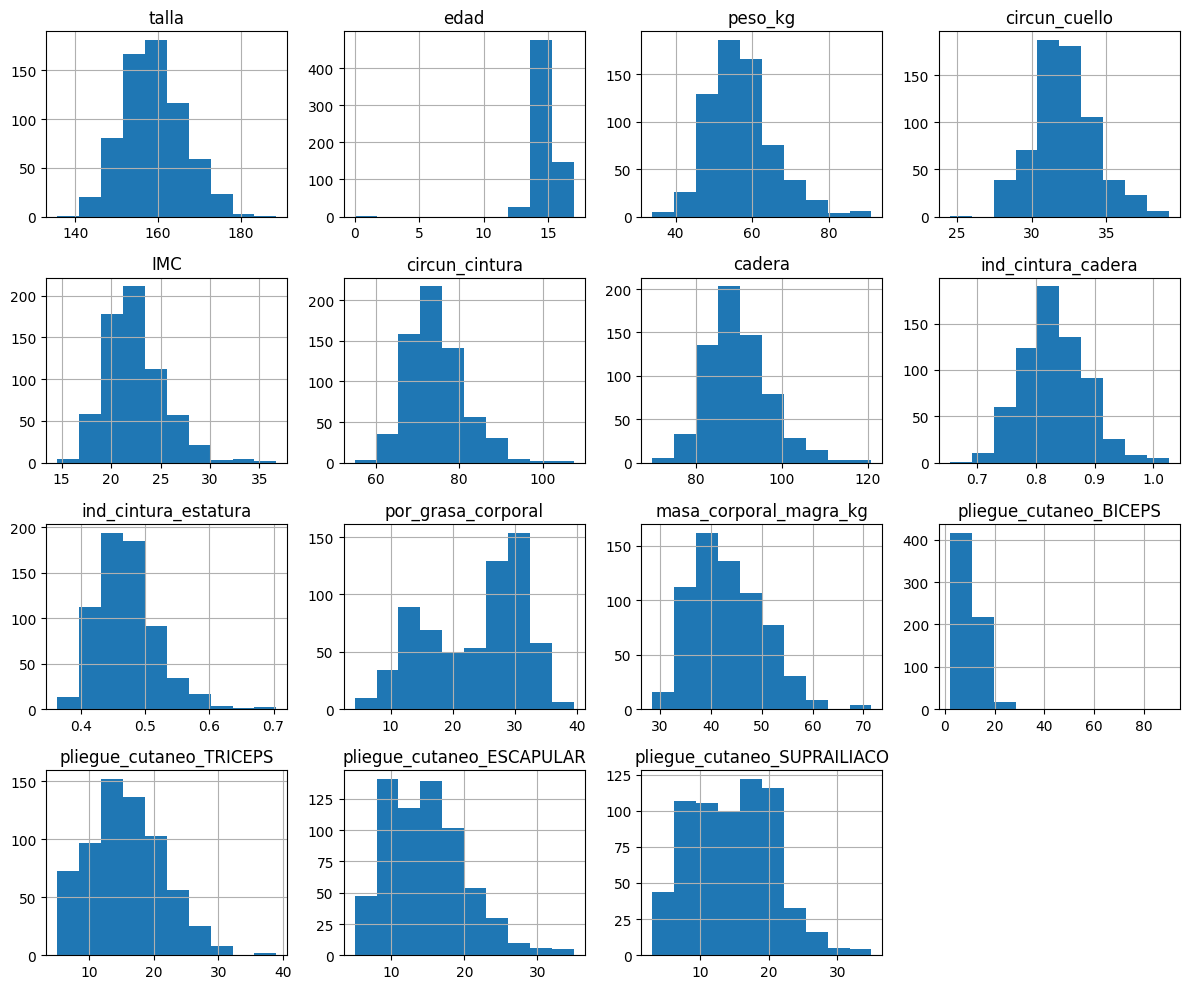

In [ ]:
# Histogramas para las variables numéricas. Uitlizando una función hist de Pandas.
# Creamos un conjunto de histogramas para todas las variables numéricas en df, con un tamaño de figura de 12x10 pulgadas.
# Los histogramas se ubicaran uno a lado del otro.
df.hist(figsize=(12, 10))
# Ajustamos automáticamente los márgenes de la figura para que no se superpongan los elementos.
plt.tight_layout()
# Mostramos las figuras generadas hasta este punto.
plt.show()

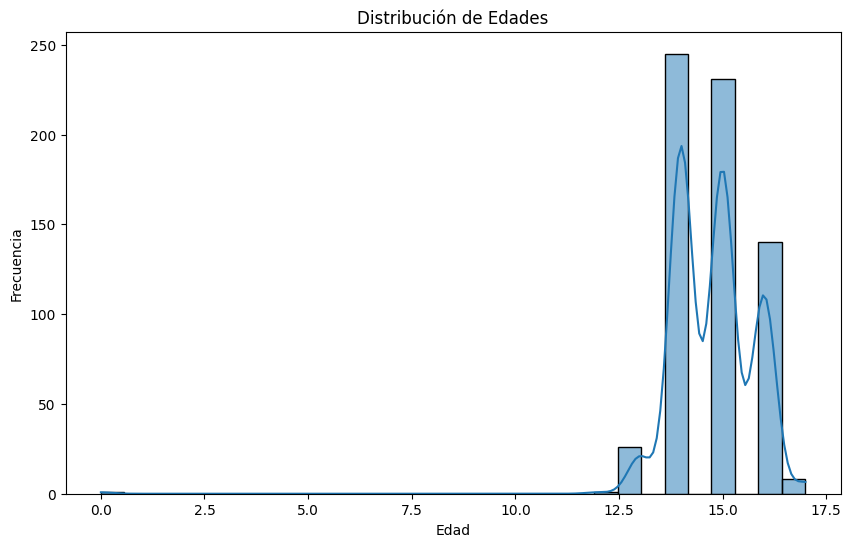

In [ ]:
# Histograma especifico de una variable (df['edad'] en este caso). Utilizando una función de la libreria: seabord.
# sns.histplot(df['edad'], bins=30, kde=True): Traza un histograma de la variable 'edad' del DataFrame df, dividiendo los datos en 30 bins y mostrando
# también una estimación de la densidad kernel (kde=True) para visualizar una distribución suavizada de edades en los datos
plt.figure(figsize=(10, 6))
sns.histplot(df['edad'], bins=30, kde=True)
plt.title('Distribución de Edades')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.show()
# sns.histplot se centra en una sola variable, pero proporciona opciones más detalladas para personalizar el gráfico.

**Explicacion:**
***sns.histplot():*** Esta función de seaborn se utiliza para trazar un histograma de una variable específica. Toma como argumentos la serie de datos que quieres graficar y permite ajustar diferentes parámetros para personalizar la apariencia del histograma.

***df['edad']: ***Aquí se accede a la columna 'edad' del DataFrame df. Esto extrae la serie de datos que representa las edades de las personas en tu conjunto de datos.

***bins=30:*** Este parámetro especifica el número de contenedores (bins) en los que se dividirá el rango de datos. Un mayor número de bins puede mostrar más detalle en la distribución, pero también puede hacer que el gráfico sea más ruidoso.

***kde=True:*** Este parámetro indica si se debe trazar una estimación de la densidad kernel (KDE) junto con el histograma. La KDE es una forma suavizada de estimar la distribución de los datos y puede proporcionar una representación visual más suave de la distribución.

**MATRIZ DE CORRELACIÓN:**

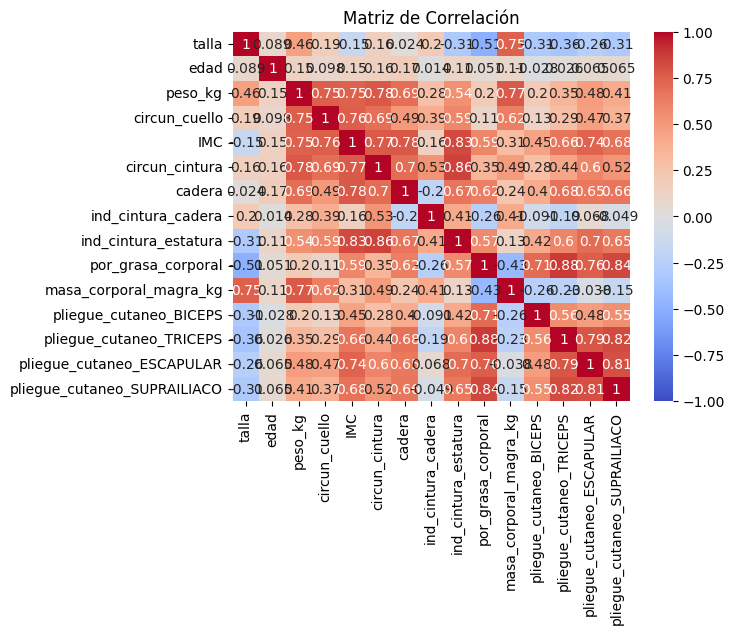

In [ ]:
# Matriz de correlación:
# NOTA: Dependiendo de la naturaleza de nuestros datos y el análisis que estamos realizando, el enfoque que se elija puede variar.
# El objetivo principal es asegurarnos de que estamos trabajando con columnas numéricas cuando calculamos la matriz de correlación para evitar errores de conversión de tipos

# filtramos las columnas del DataFrame que son de tipo float64 o int64, es decir, numéricas.
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
# Calculamos la matriz de correlación entre todas las variables numéricas en df.
correlation_matrix = df[numeric_columns].corr()
# Creamos un mapa de calor (heatmap) de la matriz de correlación utilizando seaborn, con etiquetas y una paleta de colores divergente (coolwarm).
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
# Creamos un gráfico de dispersión (scatterplot) para visualizar la relación entre el IMC y el Porcentaje de Grasa Corporal.
plt.title('Matriz de Correlación')
# Muestra las figuras generadas hasta este punto.
plt.show()

Observamos que nuestro mapa de calor no es legible debido a la cantidad de variables que estamos utilizando. Por lo tanto, en el siguiente ejercicio nos centraremos en las variables mas relevantes:

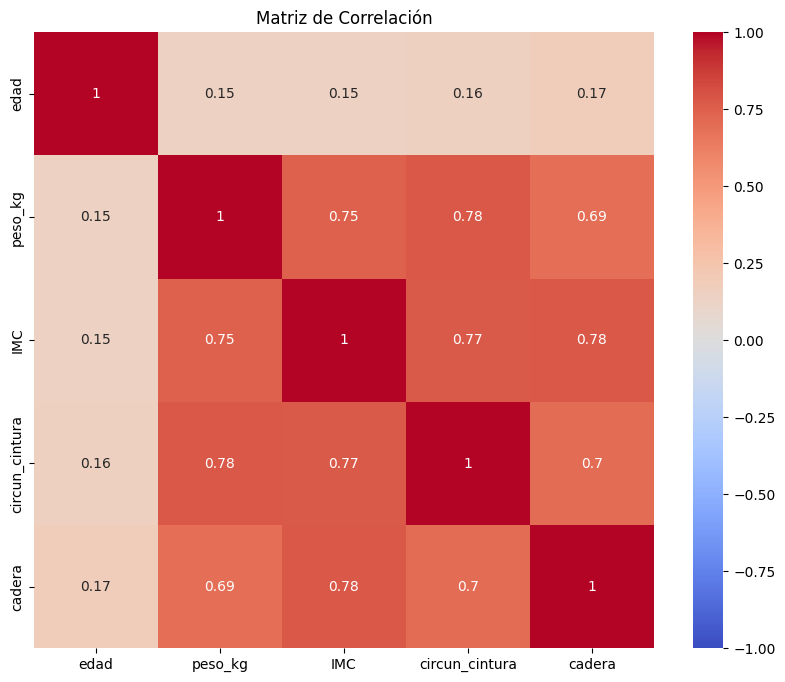

In [ ]:
# Seleccionamos un subconjunto de variables para la matriz de correlación
selected_variables = ['edad', 'peso_kg', 'IMC', 'circun_cintura', 'cadera']

# Calculamos la matriz de correlación solo para las variables seleccionadas
correlation_matrix = df[selected_variables].corr()

# Ploteamos el mapa de calor de la matriz de correlación
plt.figure(figsize=(10, 8))  # Tamaño del gráfico
# La funcion heatmap y sus parámetros:
# annot=True: Este parámetro se establece en True para mostrar los valores de correlación dentro de cada celda del mapa de calor. Los valores aparecerán dentro de las celdas y te proporcionarán información adicional sobre la magnitud de la correlación entre las variables.
# cmap='coolwarm': Esta es la paleta de colores que se utiliza para representar los valores en el mapa de calor. La paleta 'coolwarm' es una opción popular que va desde azul (valores bajos) a rojo (valores altos), lo que facilita la interpretación de las diferencias en la correlación.
# vmin=-1, vmax=1: Estos parámetros establecen los límites mínimo (vmin) y máximo (vmax) de la escala de color utilizada en el mapa de calor. En este caso, la escala de color va de -1 (correlación negativa máxima) a 1 (correlación positiva máxima), lo que permite visualizar claramente la fuerza y dirección de la correlación entre las variables.
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Matriz de Correlación')  # Título del gráfico
plt.show()

**DISPERSIÓN:**

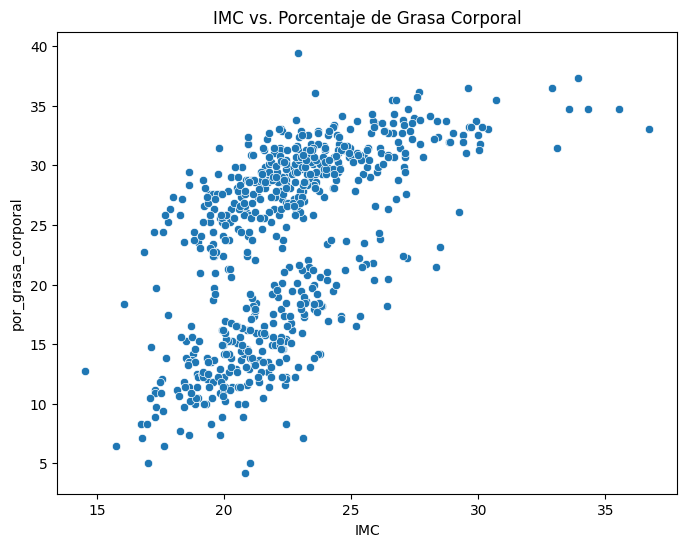

In [ ]:
# Ejercicio 1: Creamos un gráfico de dispersión (scatterplot) para visualizar la relación entre el: IMC y el Porcentaje de Grasa Corporal.
# con un tamaño de figura (figsize) de 8 x 6 pulgadas.
plt.figure(figsize=(8, 6))
# Crear el gráfico de dispersión
sns.scatterplot(x='IMC', y='por_grasa_corporal', data=df)
plt.title('IMC vs. Porcentaje de Grasa Corporal') #titulo
plt.show() #mostrar

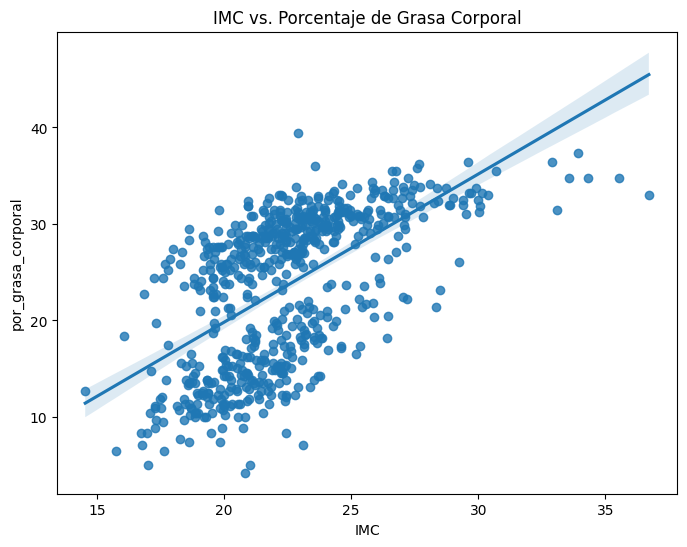

In [ ]:
# Tamaño de figura (figsize) de 8 x 6 pulgadas.
plt.figure(figsize=(8, 6))
# Crear el gráfico de dispersión agregandole una línea de tendencia (regplot)
sns.regplot(x='IMC', y='por_grasa_corporal', data=df) # línea de tendencia
plt.title('IMC vs. Porcentaje de Grasa Corporal') #titulo
plt.show() #mostrar

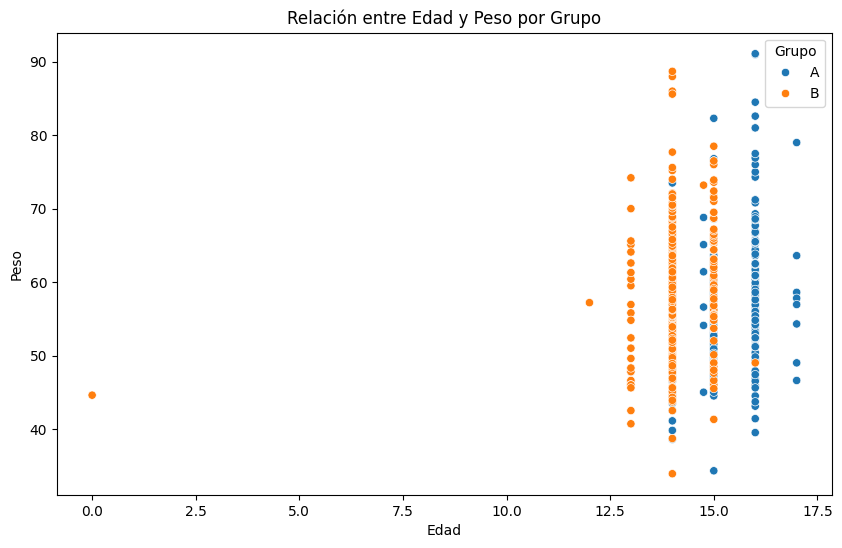

In [ ]:
# Ejercicio 2: Gráfico de dispersión: para visualizar la relación entre el: Edad y Peso x Grupo
plt.figure(figsize=(10, 6))
sns.scatterplot(x='edad', y='peso_kg', data=df, hue='Grupos') # hue para legenda
plt.title('Relación entre Edad y Peso por Grupo')
plt.xlabel('Edad')
plt.ylabel('Peso')
plt.legend(title='Grupo') # titulo de la leyenda
plt.show()

**Interpretacion Ejercicio 2 - Dispersión:**

*El punto aislado:*

 con Edad = 0 y Peso entre 40 a 50 puede ser un valor atípico o un error en los datos. Es poco común que alguien tenga una edad de 0 años con un peso entre 40 a 50 kg, por lo que es posible que este valor deba ser examinado más de cerca para determinar si es válido o si debe ser tratado como un valor atípico.

 *Aglomeración de datos:*

La aglomeración vertical entre las edades de aproximadamente 12.5 a 17.5 años indica que hay múltiples individuos en este rango de edad, pero con variabilidad en sus pesos. Esto sugiere que, dentro de este rango de edad, hay una amplia gama de pesos entre los individuos, lo que puede ser normal dependiendo de otros factores como la estatura, composición corporal, entre otros.

***Interpretación Gráfica de Dispersión: ***

*Dispersión de los Puntos:*

En el gráfico de dispersión, cada punto representa una observación individual en el conjunto de datos. La posición de cada punto en el gráfico corresponde a los valores de las dos variables que estamos comparando: IMC en el eje x (horizontal) y Porcentaje de Grasa Corporal en el eje y (vertical).

*Tendencia General:*

Observamos la tendencia general de los puntos en el gráfico. Si los puntos están distribuidos uniformemente o forman un patrón específico (como una línea recta o una curva), esto puede indicar una relación entre las dos variables. Por ejemplo, si los puntos tienden a formar una línea ascendente o descendente, sugiere una relación lineal entre el IMC y el Porcentaje de Grasa Corporal.

*Correlación:*

La disposición de los puntos puede dar pistas sobre la correlación entre las dos variables. Una alta correlación positiva significa que a medida que una variable aumenta, la otra también tiende a aumentar. Una alta correlación negativa indica que a medida que una variable aumenta, la otra tiende a disminuir. Si los puntos están dispersos sin un patrón claro, podría indicar una baja correlación o ausencia de relación lineal entre las variables.

*Distribución de los Datos:*

Observamos la dispersión y concentración de los puntos. Un gráfico de dispersión puede revelar la concentración de datos en ciertas áreas del espacio de las variables, lo cual es útil para entender cómo se distribuyen los datos y si hay agrupamientos o tendencias específicas.

*Interpretación de Outliers:*

Identificamos valores atípicos (outliers) en el gráfico. Los outliers son puntos que se encuentran lejos de la mayoría de los datos. Observarlos puede proporcionar información sobre casos especiales o errores en los datos que deben ser considerados en el análisis. Como podemos observar en el gráfico del 2do ejercicio.

**BARRAS:**

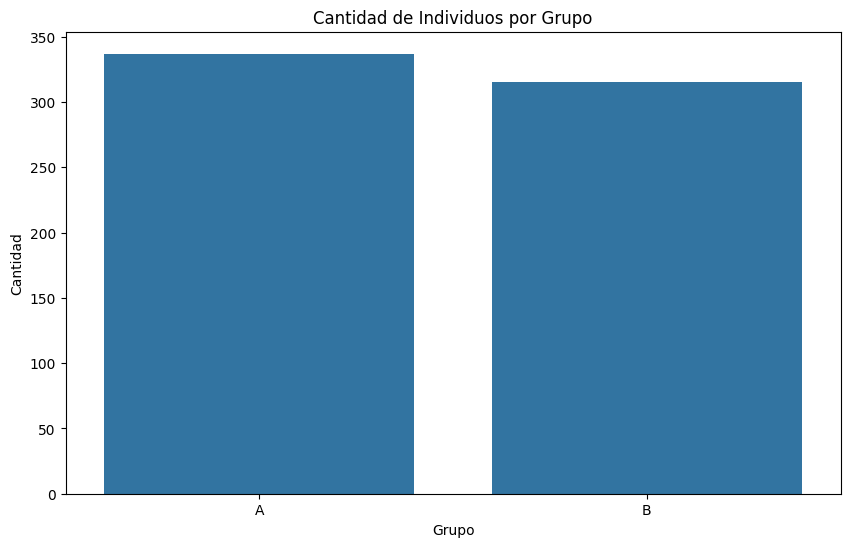

In [ ]:
# Gráfico de barras: Cantidad de Individuos por Grupo
# Configuración de la figura con un tamaño específico (ancho=10, alto=6)
plt.figure(figsize=(10, 6))
# Crear un countplot usando Seaborn (sns) para contar las ocurrencias de cada categoría en la columna 'Grupos'
sns.countplot(x='Grupos', data=df)
# Establecer el título del gráfico
plt.title('Cantidad de Individuos por Grupo')
# Etiqueta del eje x (horizontal) y eje y (vertical), indicando la variable representada
plt.xlabel('Grupo')
plt.ylabel('Cantidad')
# Mostrar el gráfico
plt.show()

**Interpretación:**

Un gráfico de barras que hemos generado permite visualizar de manera clara la distribución de la cantidad de individuos en cada grupo específico. Aquí explico cómo interpretar los datos de este tipo de gráfico:

*Eje X (Horizontal - Grupo):*

En el eje horizontal (eje x) del gráfico de barras, se representan las diferentes categorías o grupos que vamos a analizar. Cada barra en el gráfico corresponde a una categoría específica de la variable 'Grupos'. En tu caso, cada barra representa un grupo distinto (por ejemplo, Grupo A, Grupo B, etc.).

*Eje Y (Vertical - Cantidad):*

En el eje vertical (eje y) del gráfico de barras, se muestra la cantidad o frecuencia de individuos que pertenecen a cada grupo. La altura de cada barra indica cuántos individuos se encuentran en cada grupo. Cuanto más alta sea la barra, mayor es la cantidad de individuos en ese grupo en particular.

*Interpretación Visual:*

Observemos la altura de las barras: La altura de cada barra es proporcional a la cantidad de individuos en el grupo correspondiente. Podemos comparar visualmente las alturas de las barras para determinar qué grupo tiene más o menos individuos en comparación con los otros.

*Análisis de Distribución:*

El gráfico de barras permite visualizar la distribución de la población de  estudio en diferentes categorías. Puedes identificar rápidamente si hay desequilibrios o diferencias significativas en la cantidad de individuos entre los diferentes grupos.

*Facilidad de Interpretación:*

Este tipo de gráfico es útil para comunicar de manera efectiva la cantidad de datos en cada grupo, siendo fácil de interpretar incluso para audiencias no técnicas.

#Generación de Nuevas Variables:

Variable 1: Edad Categorizada:

In [ ]:
# Crea categorías de edad (por ejemplo, niños, adolescentes, adultos jóvenes, adultos mayores) a partir de la edad actual.
# Esto podría ayudar a analizar cómo varían ciertos parámetros nutricionales con la edad.
# Crear categorías de edad
bins = [0, 12, 18, 30, 50, np.inf]
labels = ['Niños', 'Adolescentes', 'Adultos jóvenes', 'Adultos de mediana edad', 'Adultos mayores']
df['Edad_Categorizada'] = pd.cut(df['edad'], bins=bins, labels=labels, right=False)

In [ ]:
# Crear un nuevo DataFrame con la edad y la categoría correspondiente
df_edad_categoria = df[['edad', 'Edad_Categorizada']]
# Mostrar el nuevo DataFrame
print(df_edad_categoria)

     edad Edad_Categorizada
0    16.0      Adolescentes
1    16.0      Adolescentes
2    16.0      Adolescentes
3    16.0      Adolescentes
4    16.0      Adolescentes
..    ...               ...
647  14.0      Adolescentes
648  14.0      Adolescentes
649  15.0      Adolescentes
650  14.0      Adolescentes
651  14.0      Adolescentes

[652 rows x 2 columns]


**Explicación:**

***bins = [0, 12, 18, 30, 50, np.inf]:*** np.inf es una constante que representa el infinito positivo, utilizada comúnmente en operaciones numéricas para representar valores infinitos.

Estás definiendo los rangos de edad para cada categoría. Aquí están los significados de estos límites:


 0, 12]: Niños (edades de 0 a 12 años)

(12, 18]: Adolescentes (edades de más de 12 años hasta 18 años)

(18, 30]: Adultos jóvenes (edades de más de 18 años hasta 30 años)

(30, 50]: Adultos de mediana edad (edades de más de 30 años hasta 50 años)

(50, np.inf): Adultos mayores (edades de más de 50 años hasta infinito)

***pd.cut(df['edad'], bins=bins, labels=labels, right=False):*** Esta función cut() de pandas crea categorías discretas (bins) para la columna 'edad' basándose en los límites definidos en bins y asigna etiquetas labels a cada categoría.

***bins = [0, 12, 18, 30, 50, np.inf]:*** Define los límites de las categorías de edad, donde cada límite representa un rango de edad.

***labels = ['Niños', 'Adolescentes', 'Adultos jóvenes', 'Adultos de mediana edad', 'Adultos mayores']:*** Etiquetas asignadas a cada categoría de edad.

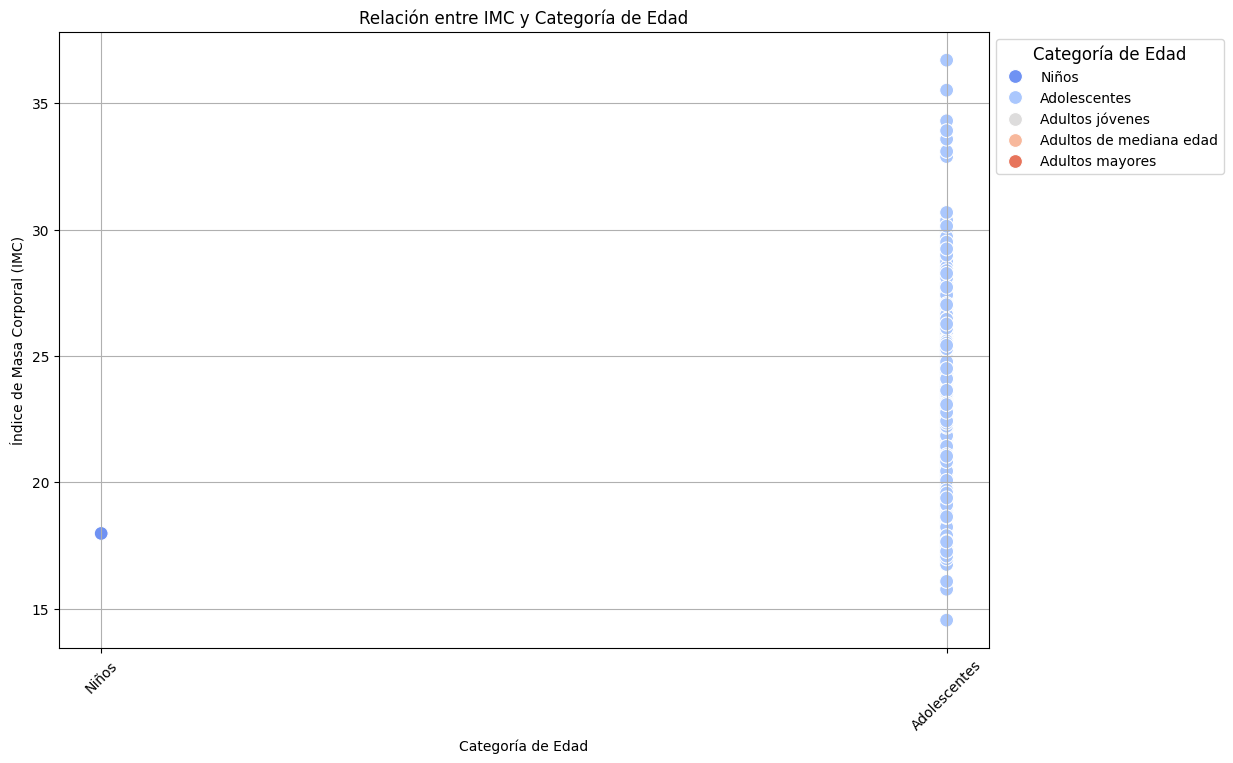

In [ ]:
# Uos de la variable 1: Crear un gráfico de dispersión (scatter plot) de IMC vs Edad_Categorizada
# Relación entre el Índice de Masa Corporal (IMC) y la categoría de edad (Edad_Categorizada), puedes utilizar un gráfico de dispersión (scatter plot)
# en el que cada punto represente un individuo con su IMC y color codificado según su categoría de edad.
plt.figure(figsize=(12, 8))
sns.scatterplot(x='Edad_Categorizada', y='IMC', data=df, hue='Edad_Categorizada', palette='coolwarm', s=100)
plt.title('Relación entre IMC y Categoría de Edad')
plt.xlabel('Categoría de Edad')
plt.ylabel('Índice de Masa Corporal (IMC)')
plt.xticks(rotation=45)  # Rotar las etiquetas del eje x para una mejor visualización
plt.legend(title='Categoría de Edad', title_fontsize='large', loc='upper left', bbox_to_anchor=(1, 1))
plt.grid(True)
plt.show()





Variable 2: Calcular la relación entre la circunferencia de la cintura y la cadera

In [ ]:
# Calcular la relación entre la circunferencia de la cintura y la cadera
df['Relación Cintura-Cadera'] = df['circun_cintura'] / df['cadera']

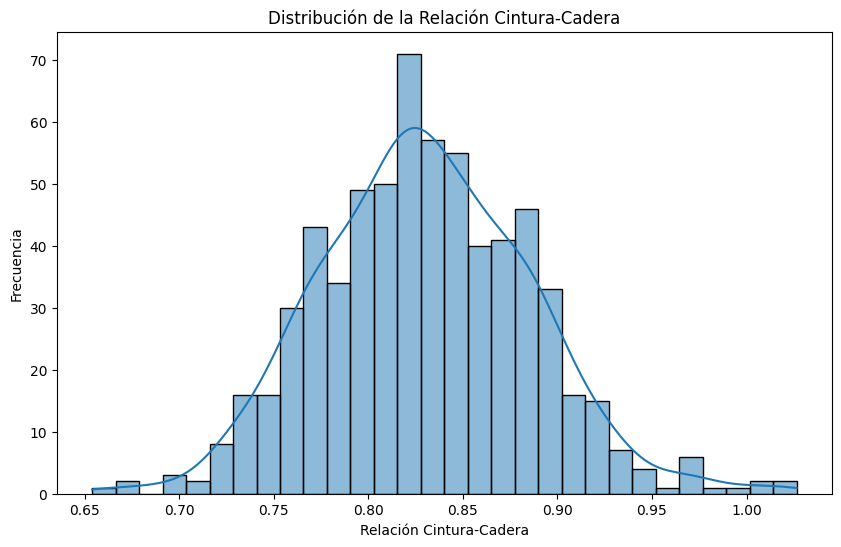

In [ ]:
# Uso de la Variable 2: Visualizar la distribución de la relación Cintura-Cadera mediante un histograma
plt.figure(figsize=(10, 6))
sns.histplot(df['Relación Cintura-Cadera'], bins=30, kde=True)
plt.title('Distribución de la Relación Cintura-Cadera')
plt.xlabel('Relación Cintura-Cadera')
plt.ylabel('Frecuencia')
plt.show()

<Figure size 1200x800 with 0 Axes>

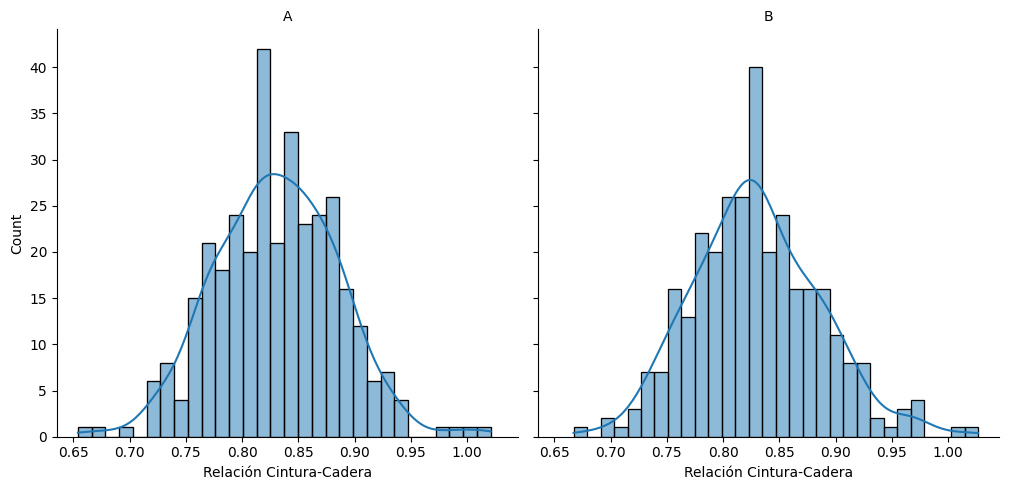

In [ ]:
# Modificamos el ejercicio anterior para: Comparar las distribuciones de la relación cintura-cadera entre los diferentes grupos.
# Creamos una nueva figura
plt.figure(figsize=(12, 8))

# Creamos una cuadrícula de gráficos facetales (FacetGrid) de Seaborn para visualizar histogramas por grupo
g = sns.FacetGrid(df, col='Grupos', col_wrap=3, height=5)

# Mapear (map) un histograma en cada gráfico de la cuadrícula para la relación cintura-cadera
g.map(sns.histplot, 'Relación Cintura-Cadera', bins=30, kde=True)

# Establecemos títulos para cada gráfico
g.set_titles(col_template="{col_name}")

# Ajustamos el espacio entre los gráficos
plt.tight_layout()

# Mostramos la visualización
plt.show()


**Interpretación:**

Interpretemos el resultado del histograma creado para visualizar la distribución de la relación cintura-cadera por grupos:

*Eje X (Relación Cintura-Cadera):*

En el eje horizontal (eje x) del histograma, se representa la relación cintura-cadera. Cada barra en el histograma representa un intervalo o rango específico de valores de la relación cintura-cadera. Los valores están agrupados en bins (contenedores) que muestran la frecuencia de ocurrencia de cada intervalo.

*Eje Y (Frecuencia):*

En el eje vertical (eje y) del histograma, se muestra la frecuencia de ocurrencia de cada intervalo de la relación cintura-cadera. La altura de cada barra indica cuántas veces se observaron valores dentro de ese rango particular de relación cintura-cadera.

*Distribución de la Relación Cintura-Cadera:*

Observa la forma y la distribución de las barras en el histograma. La distribución te da una idea de cómo se distribuyen los valores de la relación cintura-cadera en tu conjunto de datos.

Si el histograma tiene una forma simétrica y un pico central, indica que la relación cintura-cadera está distribuida de manera uniforme alrededor de ciertos valores.

Si el histograma muestra una distribución sesgada hacia un lado o tiene múltiples picos, puede indicar diferentes patrones o subgrupos dentro de tus datos.

*KDE (Estimación de Densidad Kernel):*

La línea suave que se superpone al histograma (KDE) representa la estimación de densidad de kernel de la distribución de los datos. Ayuda a suavizar la visualización de la distribución y proporciona una representación continua de la densidad de los datos.

*Interpretación Visual:*

Observa la concentración de barras en diferentes partes del histograma para identificar dónde se concentran los valores de la relación cintura-cadera.
La altura de las barras te da una idea de la frecuencia relativa de los diferentes valores de la relación cintura-cadera en tu conjunto de datos.

En resumen, al interpretar el histograma de la relación cintura-cadera, estás obteniendo información sobre la distribución y frecuencia de esta variable en tu conjunto de datos. Esta visualización te ayuda a entender mejor cómo se distribuyen los datos y a identificar posibles patrones o características importantes en la relación cintura-cadera de tus individuos.

##**Ejercicio Nº 2** - Estadística Inferencial
2do notebook: Aplicar Estadística Inferencial - Trabajar hasta con 5
variables (seleccionar las variables a preferencia).

**Análisis Estadístico Inferencial**
Realizaremos pruebas estadísticas adecuadas según el tipo de datos y las preguntas de investigación.
- Para relaciones entre variables numéricas, consideramos usar correlaciones (por ejemplo, correlación de Pearson).
- Para comparaciones entre grupos, utilizaremos pruebas como t-test, ANOVA, o pruebas no paramétricas si los supuestos no se cumplen.

**Ejemplo 1: de prueba t de dos muestras entre dos grupos:**

In [ ]:
# Dividir los datos en dos grupos (por ejemplo, Grupo A y Grupo B)
# Filtra el DataFrame df para seleccionar solo las filas donde el valor en la columna 'Grupos' es igual a 'A', creando así el grupo A.
grupo_A = df[df['Grupos'] == 'A']
grupo_A


,Individuo,talla,edad,peso_kg,circun_cuello,IMC,circun_cintura,cadera,ind_cintura_cadera,ind_cintura_estatura,por_grasa_corporal,masa_corporal_magra_kg,pliegue_cutaneo_BICEPS,pliegue_cutaneo_TRICEPS,pliegue_cutaneo_ESCAPULAR,pliegue_cutaneo_SUPRAILIACO,Grupos,Edad_Categorizada,Relación Cintura-Cadera
0,Persona 1,155.7,16.0,71.2,35.7,29.576170,90.000000,98.0,0.918367,0.578035,36.446202,45.250304,13.0,27.0,32.0,34.0,A,Adolescentes,0.918367
1,Persona 2,166.5,16.0,61.0,31.8,22.364707,80.900000,100.5,0.804975,0.485886,28.790714,43.437664,5.0,19.0,15.0,22.0,A,Adolescentes,0.804975
2,Persona 3,151.3,16.0,49.1,30.5,21.623567,72.000000,86.0,0.837209,0.475876,29.867419,34.435097,13.0,18.0,18.0,17.0,A,Adolescentes,0.837209
3,Persona 4,151.7,16.0,54.6,32.6,23.117479,74.517425,88.4,0.841629,0.490442,27.867640,39.384269,5.0,19.0,15.0,18.0,A,Adolescentes,0.842957
4,Persona 5,160.3,16.0,58.0,30.1,22.260196,74.517425,97.9,0.813075,0.470617,30.276688,40.439521,10.0,19.0,20.0,19.0,A,Adolescentes,0.761159
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
332,Persona 333,149.2,14.0,50.4,30.7,22.011946,75.000000,88.0,0.852273,0.502681,27.382942,36.598997,12.0,17.0,14.0,12.0,A,Adolescentes,0.852273
333,Persona 334,157.5,15.0,50.3,29.0,20.075586,71.000000,86.0,0.825581,0.450794,25.822129,37.311469,9.0,13.0,14.0,13.0,A,Adolescentes,0.825581
334,Persona 335,174.5,15.0,59.8,31.8,20.032676,73.000000,86.0,0.848837,0.418338,15.893914,50.295439,4.0,12.0,12.0,10.0,A,Adolescentes,0.848837
335,Persona 336,167.5,15.0,60.1,33.5,21.456895,79.600000,92.0,0.865217,0.475224,15.893914,50.547757,5.0,11.0,12.0,10.0,A,Adolescentes,0.865217


In [ ]:
# Filtra data para seleccionar filas donde el valor en 'Grupos' no sea 'A', creando así el grupo B.
grupo_B = df[df['Grupos'] == 'B']
grupo_B

,Individuo,talla,edad,peso_kg,circun_cuello,IMC,circun_cintura,cadera,ind_cintura_cadera,ind_cintura_estatura,por_grasa_corporal,masa_corporal_magra_kg,pliegue_cutaneo_BICEPS,pliegue_cutaneo_TRICEPS,pliegue_cutaneo_ESCAPULAR,pliegue_cutaneo_SUPRAILIACO,Grupos,Edad_Categorizada,Relación Cintura-Cadera
337,Persona 338,153.0,14.0,60.6,31.500000,25.332137,75.000000,99.0,0.757576,0.490196,30.869793,41.892905,9.0,24.0,20.0,18.0,B,Adolescentes,0.757576
338,Persona 339,160.0,15.0,55.2,30.500000,21.712921,74.517425,93.0,0.806452,0.468750,28.790714,39.307526,14.0,18.0,14.0,15.0,B,Adolescentes,0.801263
339,Persona 340,151.6,15.0,56.2,32.900000,24.279280,74.517425,84.8,0.860849,0.481530,28.104004,40.405550,7.0,17.0,18.0,16.0,B,Adolescentes,0.878743
340,Persona 341,150.9,15.0,76.0,35.800000,32.892989,74.517425,111.7,0.863921,0.639496,36.446202,48.300886,12.0,32.0,31.0,31.0,B,Adolescentes,0.667121
341,Persona 342,162.7,15.0,60.4,32.138042,23.157164,74.517425,83.0,0.936145,0.477566,18.964211,48.945617,7.0,12.0,17.0,13.0,B,Adolescentes,0.897800
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
647,Persona 648,165.5,14.0,88.0,32.500000,21.029381,72.500000,85.0,0.852941,0.438066,19.209928,71.095263,12.0,13.0,12.0,13.0,B,Adolescentes,0.852941
648,Persona 649,144.2,14.0,48.6,31.500000,23.132073,73.000000,87.5,0.834286,0.506241,28.565420,34.717206,8.0,18.0,18.0,16.0,B,Adolescentes,0.834286
649,Persona 650,154.0,15.0,58.9,31.500000,22.769438,85.000000,96.0,0.885417,0.551948,26.623783,43.218592,8.0,12.0,14.0,18.0,B,Adolescentes,0.885417
650,Persona 651,174.3,14.0,88.7,37.000000,27.023922,85.800000,101.0,0.849505,0.492255,22.424506,68.809463,11.0,16.0,18.0,20.0,B,Adolescentes,0.849505


In [ ]:
# Seleccionar una variable para comparar entre los dos grupos (por ejemplo, IMC)
variable_de_interes = 'IMC'

# Realiza la prueba t de dos muestras para comparar las medias de la variable de interés (por ejemplo, IMC) entre los grupos A y B.
# Calcula la estadística t y el valor p de la prueba. La condición if p_value < 0.05: comprueba si el valor p es menor que 0.05 (nivel de significancia estándar) para determinar si hay una diferencia significativa en el IMC entre los dos grupos.
t_stat, p_value = ttest_ind(grupo_A[variable_de_interes], grupo_B[variable_de_interes], equal_var=False)

print(f"Estadística t: {t_stat}")
print(f"Valor p: {p_value}")

if p_value < 0.05:
    print("La diferencia en el IMC entre los grupos es estadísticamente significativa.")
else:
    print("No hay evidencia suficiente para concluir una diferencia significativa en el IMC entre los grupos.")


Estadística t: -0.05236903534492962
Valor p: 0.9582507371584895
No hay evidencia suficiente para concluir una diferencia significativa en el IMC entre los grupos.


**Ejemplo 2:  Selección de Variables y Análisis Inferencial**

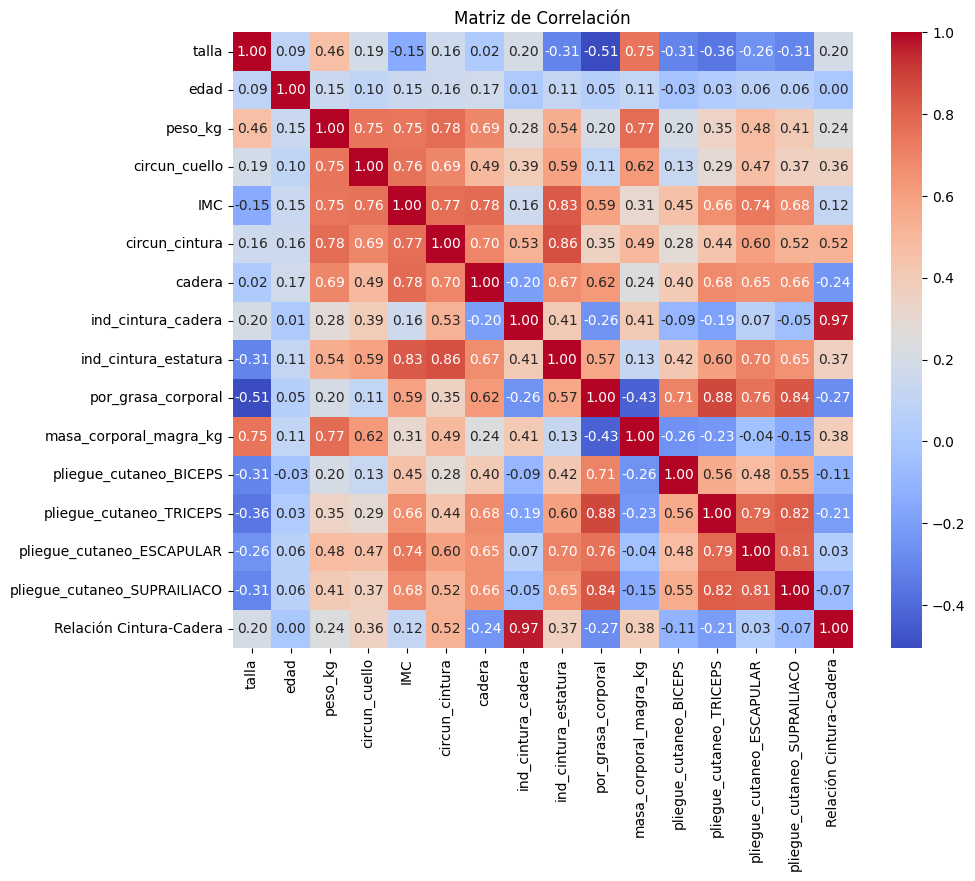

In [ ]:
# # Ejemplo de análisis inferencial (correlación)

# filtra las columnas del DataFrame que son de tipo float64 o int64, es decir, numéricas.
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
# Calcula la matriz de correlación entre todas las variables numéricas en df.
correlation_matrix = df[numeric_columns].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlación')
plt.show()


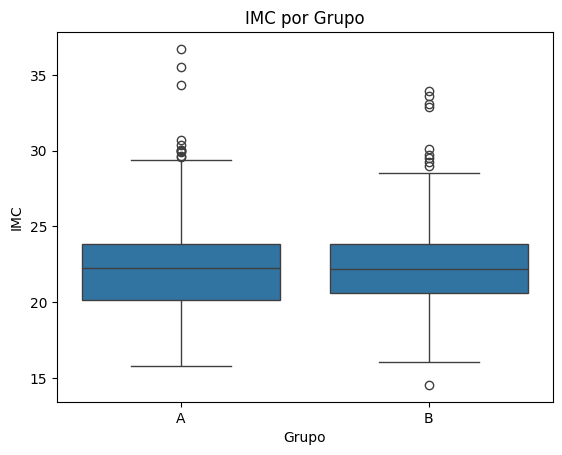

In [ ]:
# Ejercicio 2: Gráfico de Cajas (boxplot) - Comparación de variables por grupos (por ejemplo, IMC)
# Este tipo de gráfico es útil para visualizar la distribución y comparar las medidas de tendencia central y dispersión entre grupos.
sns.boxplot(x='Grupos', y='IMC', data=df)
plt.title('IMC por Grupo')
plt.xlabel('Grupo')
plt.ylabel('IMC')
plt.show()

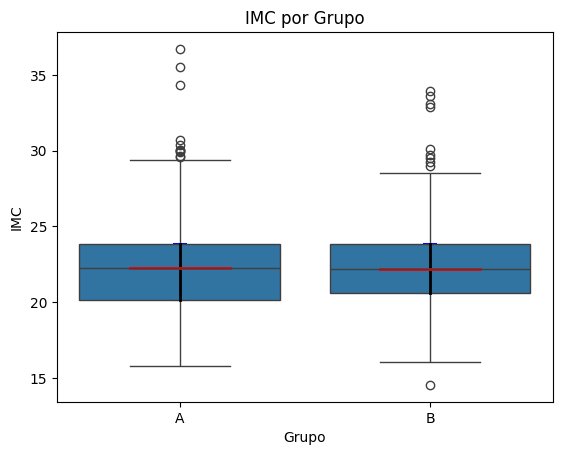

In [ ]:
# MODIFICAMOS EL GRAFICO ANTERIOR:

# Ejemplo de gráfico de caja (boxplot)
sns.boxplot(x='Grupos', y='IMC', data=df)
plt.title('IMC por Grupo')
plt.xlabel('Grupo')
plt.ylabel('IMC')

# Agregar líneas para indicar los cuartiles (Q1, Q2, Q3) y el rango intercuartil (IQR)
# Calculamos los cuantiles necesarios
q1 = df.groupby('Grupos')['IMC'].quantile(0.25)
q2 = df.groupby('Grupos')['IMC'].quantile(0.50)
q3 = df.groupby('Grupos')['IMC'].quantile(0.75)
iqr = q3 - q1

# Agregar líneas para los cuartiles y el IQR
for i, grupo in enumerate(df['Grupos'].unique()):
    plt.plot([i, i], [q1[grupo], q3[grupo]], color='black', linewidth=2)  # Caja (IQR)
    plt.plot([i-0.2, i+0.2], [q2[grupo], q2[grupo]], color='red', linewidth=2)  # Mediana (Q2)
    plt.scatter(i, q1[grupo], color='blue', s=100, marker='_')  # Q1
    plt.scatter(i, q3[grupo], color='blue', s=100, marker='_')  # Q3

# Mostrar el gráfico
plt.show()


**Interpretación:**

*Visualización de la distribución por grupo:*

El eje x ('Grupos') representa las categorías o grupos que deseas comparar.

El eje y ('IMC') representa los valores del Índice de Masa Corporal (IMC).

*Elementos del gráfico de caja:*

El gráfico de caja muestra la distribución de los valores del IMC dentro de cada grupo.

-La caja (caja intercuartil) representa el rango intercuartil (IQR), que contiene el 50% central de los datos.

-La línea en el medio de la caja representa la mediana (50º percentil) del IMC en cada grupo.

-Los "bigotes" (líneas verticales extendidas) muestran la variabilidad fuera del IQR. Pueden indicar la dispersión de los datos.

-Los puntos fuera de los bigotes pueden representar valores atípicos (outliers) en los datos.

*Comparación entre grupos:*

Observamos cómo varían las medianas y las distribuciones del IMC entre diferentes grupos.

Compara la dispersión de los valores del IMC entre grupos.
Identifica posibles diferencias en la distribución del IMC entre grupos, especialmente en términos de tendencia central y variabilidad.

*Análisis inferencial:*

En un análisis inferencial, podrías utilizar este gráfico para observar si hay diferencias significativas en el IMC entre los grupos.

Puedes realizar pruebas estadísticas, como ANOVA (Análisis de Varianza) o pruebas t, para determinar si las diferencias observadas en el IMC entre grupos son estadísticamente significativas.

Si hay diferencias significativas, esto puede tener implicaciones importantes desde el punto de vista clínico o de investigación.

In [ ]:
# Ejercicio 3: Comparación de IMC entre dos grupos utilizando t-test
grupo_A_IMC = df[df['Grupos'] == 'A']['IMC']
grupo_B_IMC = df[df['Grupos'] == 'B']['IMC']

t_stat, p_value = ttest_ind(grupo_A_IMC, grupo_B_IMC, equal_var=False)
print("Estadístico t para IMC:", t_stat)
print("Valor p para IMC:", p_value)

if p_value < 0.05:
    print("Hay una diferencia significativa en el IMC entre los grupos A y B.")
else:
    print("No hay evidencia suficiente para afirmar una diferencia significativa en el IMC.")



Estadístico t para IMC: -0.05236903534492962
Valor p para IMC: 0.9582507371584895
No hay evidencia suficiente para afirmar una diferencia significativa en el IMC.


In [ ]:
# Ejercicio 4: Comparación de edad entre grupos utilizando t-test
grupo_A_edad = df[df['Grupos'] == 'A']['edad']
grupo_B_edad = df[df['Grupos'] == 'B']['edad']

t_stat, p_value = ttest_ind(grupo_A_edad, grupo_B_edad, equal_var=False)
print("\nEstadístico t para Edad:", t_stat)
print("Valor p para Edad:", p_value)

if p_value < 0.05:
    print("Hay una diferencia significativa en la Edad entre los grupos A y B.")
else:
    print("No hay evidencia suficiente para afirmar una diferencia significativa en la Edad.")


Estadístico t para Edad: 19.30234093377704
Valor p para Edad: 6.097602055269237e-64
Hay una diferencia significativa en la Edad entre los grupos A y B.


In [ ]:
# Ejercicio 5: Obtener los pesos para los grupos A y B
grupo_A_peso = df[df['Grupos'] == 'A']['peso_kg']
grupo_B_peso = df[df['Grupos'] == 'B']['peso_kg']

# Realizar la prueba t de Student
t_stat, p_value = ttest_ind(grupo_A_peso, grupo_B_peso, equal_var=False)
print("\nEstadístico t para Peso:", t_stat)
print("Valor p para Peso:", p_value)

if p_value < 0.05:
    print("Hay una diferencia significativa en el Peso entre los grupos A y B.")
else:
    print("No hay evidencia suficiente para afirmar una diferencia significativa en el Peso.")



Estadístico t para Peso: -1.5299409689066104
Valor p para Peso: 0.1265229234512617
No hay evidencia suficiente para afirmar una diferencia significativa en el Peso.


In [ ]:
# Ejercicio 6: Obtener las tallas para los grupos A y B
grupo_A_altura = df[df['Grupos'] == 'A']['talla']
grupo_B_altura = df[df['Grupos'] == 'B']['talla']

# Realizar la prueba t de Student
t_stat, p_value = ttest_ind(grupo_A_altura, grupo_B_altura, equal_var=False)
print("\nEstadístico t para Talla:", t_stat)
print("Valor p para Altura:", p_value)

if p_value < 0.05:
    print("Hay una diferencia significativa en la Talla entre los grupos A y B.")
else:
    print("No hay evidencia suficiente para afirmar una diferencia significativa en la Talla.")



Estadístico t para Talla: -0.4161526988399546
Valor p para Altura: 0.6774396989569904
No hay evidencia suficiente para afirmar una diferencia significativa en la Talla.


**Ejercicio 7: Uso de 5 viariables**

Aplicar la prueba ANOVA (Análisis de Varianza) para comparar las medias de algunas de estas variables entre diferentes grupos.

Supongamos que queremos comparar las medias de las siguientes cinco variables entre los diferentes grupos (Grupo A y Grupo B):

1.IMC (Índice de Masa Corporal)
2.Edad
3.Peso en kg
4.Circunferencia de Cintura
5.Circunferencia de Cadera

Asumiendo que Grupo es la variable que define los grupos de interés, podemos realizar un análisis de varianza (ANOVA) para determinar si hay diferencias significativas en estas variables entre los grupos A y B.

In [ ]:
import scipy.stats as stats
# Suponiendo que 'df' es tu DataFrame que contiene las variables de interés
# y 'Grupos' es la columna que define los grupos

# Seleccionamos las variables de interés
variables_seleccionadas = ['IMC', 'edad', 'peso_kg', 'circun_cintura', 'cadera', 'Grupos']

# Filtramos el DataFrame para incluir solo las variables seleccionadas
data_subset = df[variables_seleccionadas]

# Dividimos los datos en dos grupos (Grupo A y Grupo B)
grupo_A = data_subset[data_subset['Grupos'] == 'A']
grupo_B = data_subset[data_subset['Grupos'] == 'B']

# Realizamos el ANOVA para cada variable de interés: Para cada una de las cinco variables de interés, calculamos la estadística F y el valor p
# utilizando la función stats.f_oneway() de SciPy, que realiza el ANOVA para dos o más grupos.
for variable in ['IMC', 'edad', 'peso_kg', 'circun_cintura', 'cadera']:
    f_statistic, p_value = stats.f_oneway(grupo_A[variable], grupo_B[variable])
    print(f"Variable: {variable}")
    print(f"Estadística F: {f_statistic}")
    print(f"Valor p: {p_value}")
    if p_value < 0.05:
        print("La diferencia entre los grupos es estadísticamente significativa.")
    else:
        print("No hay suficiente evidencia para concluir una diferencia significativa entre los grupos.")
    print("")


Variable: IMC
Estadística F: 0.002728680236514406
Valor p: 0.9583560830349818
No hay suficiente evidencia para concluir una diferencia significativa entre los grupos.

Variable: edad
Estadística F: 381.39205889798603
Valor p: 3.502078221811069e-67
La diferencia entre los grupos es estadísticamente significativa.

Variable: peso_kg
Estadística F: 2.3462155853524775
Valor p: 0.12607409138184245
No hay suficiente evidencia para concluir una diferencia significativa entre los grupos.

Variable: circun_cintura
Estadística F: 0.0015466638160959525
Valor p: 0.968641240378209
No hay suficiente evidencia para concluir una diferencia significativa entre los grupos.

Variable: cadera
Estadística F: 0.01430101109152907
Valor p: 0.9048474001394103
No hay suficiente evidencia para concluir una diferencia significativa entre los grupos.



**INTERPRETACIÓN:**

***1. Variable: IMC***

*Estadística F:* 0.002728680236514406

*Valor p:* 0.9583560830349818

**Interpretación:** El valor p (0.9584) es mayor que el umbral comúnmente utilizado de 0.05. Por lo tanto, no hay suficiente evidencia para rechazar la hipótesis nula. Esto sugiere que no hay diferencias significativas en el Índice de Masa Corporal (IMC) entre los grupos A y B.

***2. Variable: Edad***

*Estadística F:* 381.39205889798603

*Valor p:* 3.502078221811069e-67

**Interpretación:** El valor p (3.502e-67) es extremadamente pequeño, esencialmente cero. Esto indica una diferencia altamente significativa en la edad entre los grupos A y B. La estadística F alta también respalda esta diferencia significativa.

***3. Variable: Peso (peso_kg)***

*Estadística F:* 2.3462155853524775

*Valor p:* 0.12607409138184245

**Interpretación:** El valor p (0.1261) es mayor que 0.05, lo que indica que no hay suficiente evidencia para rechazar la hipótesis nula. Esto sugiere que no hay diferencias significativas en el peso entre los grupos A y B.

***4. Variable: Circunferencia de Cintura (circun_cintura)***

*Estadística F:* 0.0015466638160959525

*Valor p:* 0.968641240378209

**Interpretación: ** El valor p (0.9686) es mayor que 0.05, lo que indica que no hay suficiente evidencia para rechazar la hipótesis nula. Esto sugiere que no hay diferencias significativas en la circunferencia de la cintura entre los grupos A y B.

***5. Variable: Circunferencia de Cadera (cadera)***

*Estadística F:* 0.01430101109152907

*Valor p:* 0.9048474001394103

**Interpretación: ** El valor p (0.9048) es mayor que 0.05, lo que indica que no hay suficiente evidencia para rechazar la hipótesis nula. Esto sugiere que no hay diferencias significativas en la circunferencia de la cadera entre los grupos A y B.

**RESUMIENDO:**
Para las variables IMC, peso_kg, circun_cintura y cadera, no hay diferencias significativas entre los grupos A y B, según el análisis ANOVA (p > 0.05).
Sin embargo, para la variable Edad, existe una diferencia altamente significativa entre los grupos A y B, donde el grupo al que pertenece un individuo parece tener un impacto significativo en su edad.

**VISUALIZACIÓN:**

Gráfico de barras (bar plot) que muestre las estadísticas F o los valores p para cada una de las variables analizadas. Esto te permitirá comparar visualmente la significancia estadística entre las variables.

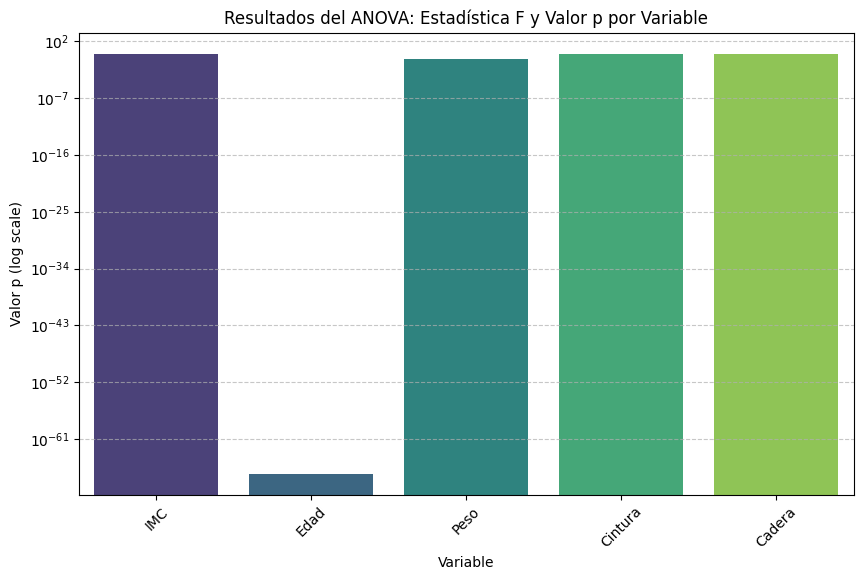

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Variables y resultados del ANOVA
variables = ['IMC', 'Edad', 'Peso', 'Cintura', 'Cadera']
# Colocamos los valores F y p, obtenidos en cada analisis del paso anterior.
f_statistics = [0.002728680236514406, 381.39205889798603, 2.3462155853524775, 0.0015466638160959525, 0.01430101109152907]
p_values = [0.9583560830349818, 3.502078221811069e-67, 0.12607409138184245, 0.968641240378209, 0.9048474001394103]

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
sns.barplot(x=variables, y=p_values, hue=variables, palette='viridis', dodge=False)
plt.yscale('log')  # Escala logarítmica para los valores p
plt.title('Resultados del ANOVA: Estadística F y Valor p por Variable')
plt.xlabel('Variable')
plt.ylabel('Valor p (log scale)')
plt.xticks(rotation=45)
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.show()


Este código crea un gráfico de barras donde el eje x representa las variables analizadas (por ejemplo, IMC, Edad, Peso, Cintura, Cadera) y el eje y representa los valores p (usando una escala logarítmica para resaltar diferencias menores). Los colores se definen mediante una paleta de colores ('viridis' en este caso).

- Las barras más cortas indican valores p más pequeños (más significativos).
- Las barras más largas indican valores p más grandes (menos significativos).

Este tipo de gráfico permitirá visualizar rápidamente qué variables mostraron diferencias significativas entre los grupos (barras más cortas) y cuáles no (barras más largas). La escala logarítmica en el eje y es útil para comparar valores p que abarcan varios órdenes de magnitud.

**Ejercicio 8: Análisis de correlación**

Basándome en las variables de valor que hemos utilizado en el contexto de un análisis nutricional, vamo a realizar la correlación entre aquellas variables que podrían tener una relación directa o indirecta con el estado nutricional y la composición corporal. Propongo algunas de las variables que podrían ser más relevantes para realizar un análisis de correlación significativo:
*texto en cursiva*
***Índice de Masa Corporal (IMC):*** El IMC es una medida comúnmente utilizada para evaluar el estado nutricional en relación con el peso y la altura de una persona.

***Edad:*** La edad puede influir en varios aspectos relacionados con el estado nutricional y la composición corporal, ya que ciertos parámetros pueden cambiar con la edad.

***Peso (kg):*** El peso corporal es un factor clave para evaluar el estado nutricional y su relación con otras variables.

***Circunferencia de Cintura:*** Esta medida está relacionada con la distribución de la grasa corporal y puede ser un indicador de riesgo cardiovascular.

**Circunferencia de Cadera:** La relación entre la circunferencia de la cintura y la cadera (índice cintura-cadera) es importante para evaluar la distribución de la grasa corporal y los riesgos asociados.

***Porcentaje de Grasa Corporal:*** Esta medida proporciona información sobre la composición corporal y la distribución de la masa grasa en relación con la masa magra.

Al correlacionar estas variables, podrías explorar relaciones como:

1. La relación entre el IMC y otras medidas antropométricas.
2. Cómo cambian las medidas con la edad.
3. La correlación entre la distribución de la grasa corporal y otros parámetros.

***Vamos a mostrar cómo se podría realizar la correlación entre estas variables:***

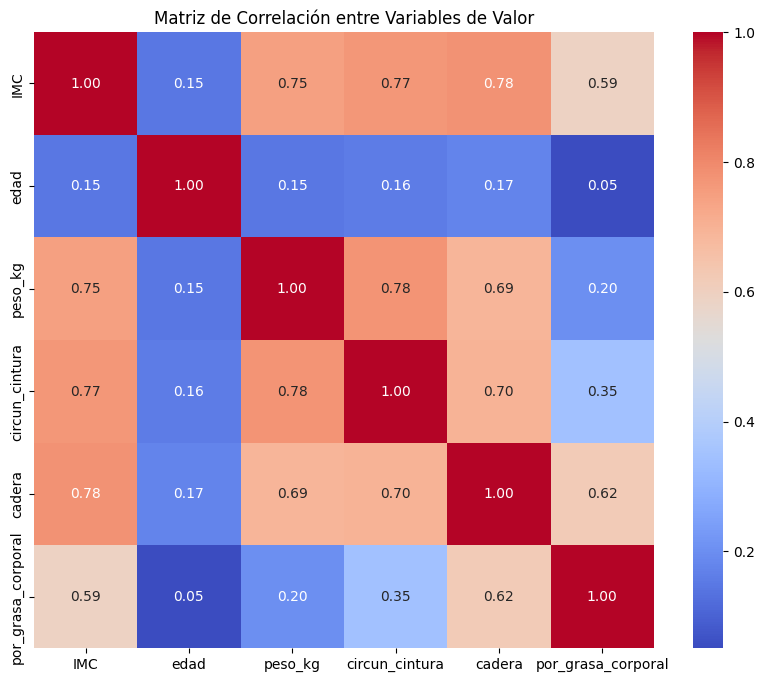

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Continuamos con el conjunto de datos ya cargado en unuestro DataFrame llamado 'df'

# Seleccionar las variables de interés para la correlación
variables_of_interest = ['IMC', 'edad', 'peso_kg', 'circun_cintura', 'cadera', 'por_grasa_corporal']

# Filtrar el DataFrame para incluir solo las variables de interés
df_subset = df[variables_of_interest]

# Calcular la matriz de correlación
correlation_matrix = df_subset.corr()

# Visualizar la matriz de correlación como un mapa de calor
plt.figure(figsize=(10, 8))
# función sns.heatmap() utilizada para visualizar la matriz de correlación
# correlation_matrix, es la matriz de correlación calculada previamente utilizando Pandas.
# annot=True: Este parámetro se refiere a la anotación de los valores en cada celda del mapa de calor. Cuando annot=True, los valores de la matriz de correlación se muestran en cada celda del gráfico.
# cmap='coolwarm': Este parámetro define el mapa de colores que se utilizará para representar los valores en el mapa de calor. En este caso, 'coolwarm' es un mapa de colores que va desde tonos fríos (azules) hasta tonos cálidos (rojos).
# fmt=".2f": Este parámetro especifica el formato de cadena que se utilizará para mostrar los valores en las celdas del mapa de calor. En este caso, ".2f" significa que los valores se mostrarán como números de punto flotante con dos decimales.
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
# Asignar titulo al gráfico
plt.title('Matriz de Correlación entre Variables de Valor')
# Mostrar gráfico
plt.show()


Cada celda representa la correlación entre pares de variables.

Interpretar un mapa de calor generado a partir de una matriz de correlación permite visualizar las relaciones entre pares de variables en nuestros datos.

**Veamos como interpretamos este tipo de gráfico:**

**Colores del mapa de calor:**

Los colores del mapa de calor representan el grado de correlación entre las variables. Generalmente, se utiliza un esquema de colores que va desde tonos fríos (como azul) hasta tonos cálidos (como rojo).

Un **color azul oscuro** indica una correlación negativa (variables que varían en direcciones opuestas), mientras que un **color rojo oscuro** indica una correlación positiva (variables que varían en la misma dirección).

**Valores numéricos en las celdas:**

Cada celda del mapa de calor contiene un número que representa el coeficiente de correlación entre dos variables.
Los valores se muestran utilizando el formato especificado (por ejemplo, .2f para dos decimales).

Un valor cercano a 1 o -1 indica una correlación fuerte, mientras que un valor cercano a 0 indica una correlación débil.

***Interpretación de la intensidad del color:***

Observa la intensidad del color en las celdas para determinar la fuerza de la correlación.

Un color más intenso (ya sea azul oscuro o rojo oscuro) indica una correlación más fuerte entre las variables.

***Identificación de patrones:***

Examina patrones en el mapa de calor para identificar grupos de variables que están altamente correlacionadas entre sí.

Las correlaciones positivas indican que las variables tienden a moverse juntas en la misma dirección, mientras que las correlaciones negativas indican movimientos opuestos.

***Línea diagonal:***

La línea diagonal (de color generalmente neutro) representa la correlación de una variable consigo misma, que siempre será 1 (correlación perfecta).

Al interpretar un mapa de calor, se busca identificar relaciones significativas entre las variables y se utiliza esta información para comprender mejor la estructura de tus datos.

Las visualizaciones como esta son útiles para la exploración inicial y pueden guiar el análisis posterior, como la selección de variables para modelos predictivos o análisis más detallados de relaciones entre variables.